The representation graph offers a mathematical handle on YAML. These examples should help understanding the richness of such graph when using sequences, maps and nesting. It is a bipartite graph representing the document incidence structure. This lifts our graph to a higher-order hypergraph.

* https://en.wikipedia.org/wiki/Hypergraph

In [9]:
import networkx as nx

from src.nx_yaml import nx_compose_all as load, nx_serialize_all as dump

def draw(G):
    node_labels = {n: G.nodes[n].get("value") or G.nodes[n].get("tag") or G.nodes[n].get("kind") for n in G}
    nx.draw_planar(G, labels=node_labels)

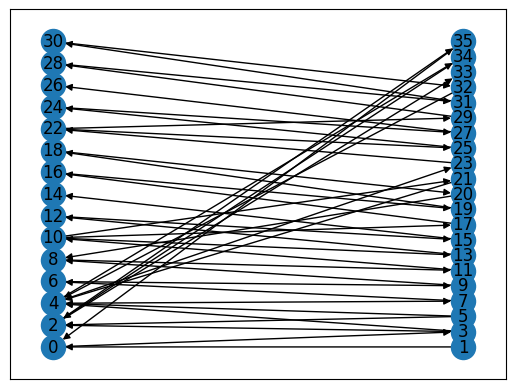

In [10]:
G0 = load("""
- a:
    b: c
    d: e
- {c, d}
""")
nodes = {n for n, b in G0.nodes(data="bipartite") if b == 0}
pos = nx.bipartite_layout(G0, nodes=nodes)
nx.draw_networkx(G0, pos=pos)

One of the simplest possible documents is one containing a single string. The encoding of this incidence requires two nodes: one for the root of the document and one for the scalar node, along with an attribute `value` for the actual string content.

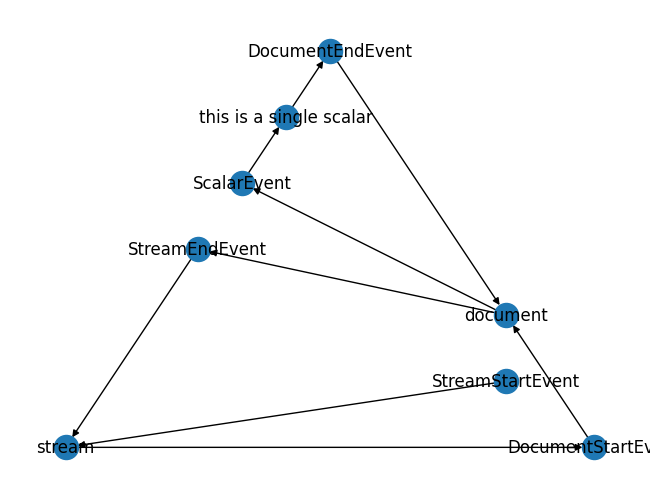

In [11]:
G1 = load("this is a single scalar")
# print(G1.nodes[8]["value"])
draw(G1)

In the case of mappings it is common to define the incidence of a string into another one.

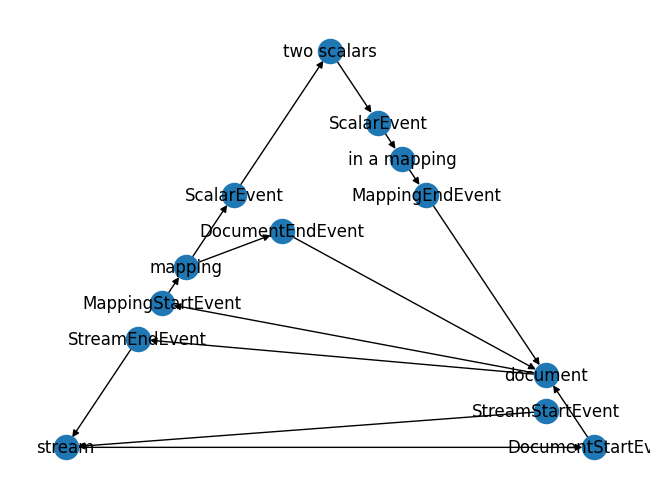

In [12]:
G2 = load("two scalars: in a mapping")
# the root is the mapping itself
# print(G2.nodes[12]["value"])
# print(G2.nodes[16]["value"])
draw(G2)

We also see strings incident into mappings or lists.

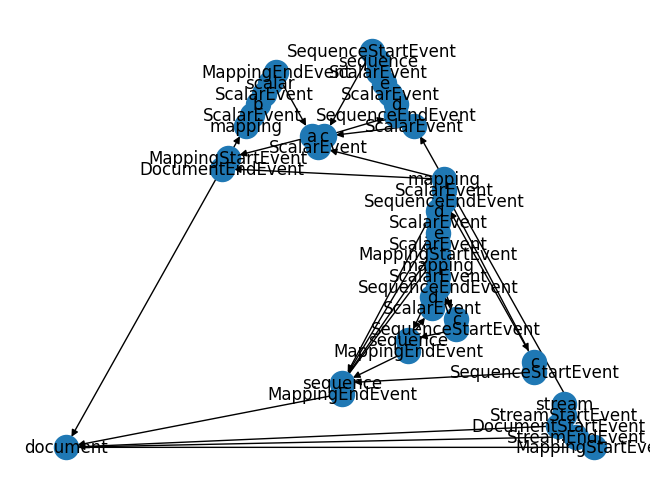

In [13]:
G3 = load("{a: {b: ""}, c: [d, e], c: [d, e, c: [d]]}")
draw(G3)

We can change the graph and dump it back to YAML. For example we can find and replace the empty scalar `""` with `null`.

In [14]:
G4 = G3.copy()
for n, d in G4.nodes(data=True):
    if d["bipartite"] == 1 and d.get("kind") == "scalar" and d["value"] == "":
        d["value"] = "null"
print(dump(G4))

EmitterError: unknown node kind event